# Compare robustness of Whisper and Wav2Vec2 to noise and downsampling

In [28]:
import plotly.express as px
import utils
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# set paths for input/output
root = '/home/sivan'
project = '/home/sivan/asr'
datasets_path = os.path.join(root, 'datasets')
predictions_path = os.path.join(root, 'predictions')

In [3]:
# load prediction datasets and calculate WER

# 6 types of sample rates
sr = [16000, 8000, 4000, 2000, 1000, 500]

# 6 rates of noise
noise = [1,2,3,4,5,6]
wp_predictions = {}
wv_predictions = {}

wp_ds_wer = []
wp_ns_wer = []
wv_ds_wer = []
wv_ns_wer = []

# WER (reference, hypothesis_clean)
for i, j in zip(sr, noise):
    # sr
    # whisper
    wp_predictions[i] = utils.load_from_disk(utils.os.path.join(predictions_path, 'lr_clean_test_ds_{}Hz_whisper_base.en'.format(i)))
    ds = utils.format_wer(wp_predictions[i]["ground_truth"], wp_predictions[i]["transcription"])
    print('WER: Whisper_base.en, ls-test-clean-{}Hz:'.format(i), ds, '%.')
    wp_ds_wer.append(ds)
    # wav2vec
    wv_predictions[i] = utils.load_from_disk(utils.os.path.join(datasets_path, 'lr_clean_test_ds_{}Hz_w2v2_base_960h'.format(i)))
    ds = utils.format_wer(wv_predictions[i]["ground_truth"], wv_predictions[i]["transcription"])
    print('WER: w2v2_base_960h, ls-test-clean-{}Hz:'.format(i), ds, '%.')
    wv_ds_wer.append(ds)

    # ns
    # whisper
    wp_predictions[j] = utils.load_from_disk(utils.os.path.join(predictions_path, 'lr_clean_test_ns_{}%_whisper_base.en'.format(j)))
    ns = utils.format_wer(wp_predictions[j]["ground_truth"], wp_predictions[j]["transcription"])
    print('WER: Whisper_base.en, ls-test-clean-{}%:'.format(j), ns, '%.')
    wp_ns_wer.append(ns)
    # wav2vec
    wv_predictions[j] = utils.load_from_disk(utils.os.path.join(datasets_path, 'lr_clean_test_ns_{}%_w2v2_base_960h'.format(j)))
    ns = utils.format_wer(wv_predictions[j]["ground_truth"], wv_predictions[j]["transcription"])
    print('WER: w2v2_base_960h, ls-test-clean-{}%:'.format(j), ns, '%.')
    wv_ns_wer.append(ns)


# make a dataset and save WER data
# print(sr, wp_ds_wer, wv_ds_wer, noise, wp_ns_wer, wv_ns_wer)
wer_df = pd.DataFrame(np.column_stack([sr, wp_ds_wer, wv_ds_wer,
                                       noise, wp_ns_wer, wv_ns_wer]),
                      columns=['sample_rate', 'whisper_ds_wer', 'wav2vec2_ds_wer',
                               'noise_rate', 'whisper_ns_wer', 'wav2vec2_ns_wer'])

wer_df.to_csv(os.path.join(os.getcwd(), 'wer_df.csv'))
wer_df

WER: Whisper_base.en, ls-test-clean-16000Hz: 4.3 %.
WER: w2v2_base_960h, ls-test-clean-16000Hz: 3.4 %.
WER: Whisper_base.en, ls-test-clean-1%: 6.0 %.
WER: w2v2_base_960h, ls-test-clean-1%: 8.3 %.
WER: Whisper_base.en, ls-test-clean-8000Hz: 4.8 %.
WER: w2v2_base_960h, ls-test-clean-8000Hz: 4.2 %.
WER: Whisper_base.en, ls-test-clean-2%: 11.0 %.
WER: w2v2_base_960h, ls-test-clean-2%: 30.1 %.
WER: Whisper_base.en, ls-test-clean-4000Hz: 13.2 %.
WER: w2v2_base_960h, ls-test-clean-4000Hz: 20.3 %.
WER: Whisper_base.en, ls-test-clean-3%: 15.6 %.
WER: w2v2_base_960h, ls-test-clean-3%: 57.6 %.
WER: Whisper_base.en, ls-test-clean-2000Hz: 60.9 %.
WER: w2v2_base_960h, ls-test-clean-2000Hz: 84.9 %.
WER: Whisper_base.en, ls-test-clean-4%: 24.1 %.
WER: w2v2_base_960h, ls-test-clean-4%: 76.8 %.
WER: Whisper_base.en, ls-test-clean-1000Hz: 305.2 %.
WER: w2v2_base_960h, ls-test-clean-1000Hz: 99.2 %.
WER: Whisper_base.en, ls-test-clean-5%: 33.9 %.
WER: w2v2_base_960h, ls-test-clean-5%: 87.3 %.
WER: Whisper_

,sample_rate,whisper_ds_wer,wav2vec2_ds_wer,noise_rate,whisper_ns_wer,wav2vec2_ns_wer
0,16000.0,4.3,3.4,1.0,6.0,8.3
1,8000.0,4.8,4.2,2.0,11.0,30.1
2,4000.0,13.2,20.3,3.0,15.6,57.6
3,2000.0,60.9,84.9,4.0,24.1,76.8
4,1000.0,305.2,99.2,5.0,33.9,87.3
5,500.0,99.4,100.0,6.0,40.1,92.5


## Downsampling

In [90]:
df

,Unnamed: 0,sample_rate,whisper_ds_wer,wav2vec2_ds_wer,noise_rate,whisper_ns_wer,wav2vec2_ns_wer
0,0,16000.0,4.3,3.4,1.0,6.0,8.3
1,1,8000.0,4.8,4.2,2.0,11.0,30.1
2,2,4000.0,13.2,20.3,3.0,15.6,57.6
3,3,2000.0,60.9,84.9,4.0,24.1,76.8
4,4,1000.0,305.2,99.2,5.0,33.9,87.3
5,5,500.0,99.4,100.0,6.0,40.1,92.5


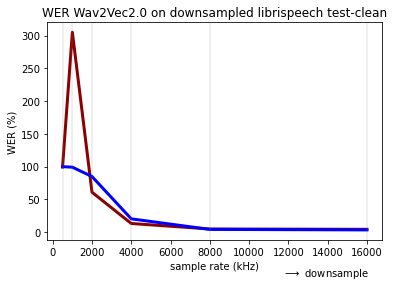

In [66]:
df = pd.read_csv(os.path.join(os.getcwd(), 'wer_df.csv'))
x_values = df['sample_rate']
# set figure
# x_values = [1,2,3,4,5,6]
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x_values, df['whisper_ds_wer'], linewidth = 3, color='darkred')
ax.plot(x_values, df['wav2vec2_ds_wer'], linewidth = 3, color='blue')

# ax.set_xticklabels([0, '16 \n original', 8, 4, 2, 1, 0.5])
for xc in x_values:
    plt.axvline(x=xc, color='grey', linewidth=0.25)
fig.canvas.draw()

# plot
plt.xlabel('sample rate (kHz)')
plt.ylabel('WER (%)')
plt.title('WER Wav2Vec2.0 on downsampled librispeech test-clean')
plt.figtext(0.77, 0, r'$\longrightarrow$ downsample', ha='center')
plt.show()

In [16]:
df[0]

KeyError: 0

In [70]:
df = pd.read_csv(os.path.join(os.getcwd(), 'wer_df.csv'))
df = df.drop(index= 4)
y = ['whisper_ds_wer', 'wav2vec2_ds_wer','wav2vec2_4gram_ds_wer']
fig = px.line(df, x='sample_rate', y=y,
              markers=True)
# fig.add_scatter(name = "model",x=df['sample_rate'], y=df['wav2vec2_ds_wer'], mode='markers+lines', hovertext=df['wav2vec2_ds_wer'], hoverinfo="text")

fig.update_layout(
xaxis_type = 'category'
)


fig.update_layout(
    yaxis_title='WER (%)',
    xaxis_title='Sample Rate (Hz)',
    title='WER% of Whisper and Wav2Vec2.0 on Downsampled Librispeech Test-clean',
    hovermode="x"
)
fig.add_annotation(text=r'$\longrightarrow$',
                    align='center',
                    showarrow=False,
                    # xref='paper',
                    # yref='paper',
                    x=3.6,
                    y=0.8,
                    # bordercolor='black',
                    borderwidth=1)

fig.add_annotation(text= 'Downsampling',
                    align='center',
                    showarrow=False,
                    # xref='paper',
                    # yref='paper',
                    x=4,
                    y=0.8,
                    # bordercolor='black',
                    borderwidth=1)
fig.update_layout(legend=dict(
    title='Models',
    yanchor="top",
    xanchor="left",
    x=0.01,
    y=0.99
))

fig.show()

## Noise

In [14]:
df = pd.read_csv(os.path.join(os.getcwd(), 'wer_df.csv'))
y = ['whisper_ns_wer', 'wav2vec2_ns_wer']
fig = px.line(df, x='noise_rate', y=y,
              markers=True)
# fig.add_scatter(name = "model",x=df['sample_rate'], y=df['wav2vec2_ds_wer'], mode='markers+lines', hovertext=df['wav2vec2_ds_wer'], hoverinfo="text")

fig.update_layout(
xaxis_type = 'category'
)


fig.update_layout(
    yaxis_title='WER (%)',
    xaxis_title='Noise Rate (%)',
    title='WER% of Whisper and Wav2Vec2.0 on Noisy Librispeech Test-clean',
    hovermode="x"
)
fig.add_annotation(text= r'$\longrightarrow$',
                    align='center',
                    showarrow=False,
                    # xref='paper',
                    # yref='paper',
                    x=4.5,
                    y=0.8,
                    # bordercolor='black',
                    borderwidth=1)

fig.add_annotation(text= 'Adding noise',
                    align='center',
                    showarrow=False,
                    # xref='paper',
                    # yref='paper',
                    x=5,
                    y=0.8,
                    # bordercolor='black',
                    borderwidth=1)
fig.update_layout(legend=dict(
    title='Models',
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()